In [ ]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import keras
import matplotlib.pyplot as plt

In [ ]:
train_idg = ImageDataGenerator(rescale=1/255, width_shift_range=0.2, height_shift_range=0.3, zoom_range=0.2)

In [ ]:
train_data = train_idg.flow_from_directory(directory='drive/My Drive/cats_dogs/dataset/training_set', target_size=(64, 64), batch_size=32, class_mode='binary')

Found 8000 images belonging to 2 classes.


In [ ]:
test_idg = ImageDataGenerator(rescale=1/255)

In [ ]:
test_data = test_idg.flow_from_directory(directory='drive/My Drive/cats_dogs/dataset/test_set', target_size=(64, 64), batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
cnn = keras.Sequential()

In [ ]:
cnn.add(keras.layers.Conv2D(filters=10, kernel_size=(3, 3), padding='same', activation='relu', strides=(1, 1), input_shape=[64, 64, 3]))

In [ ]:
cnn.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

In [ ]:
cnn.add(keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu', strides=(1, 1)))

In [ ]:
cnn.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

In [ ]:
cnn.add(keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu', strides=(1, 1)))

In [ ]:
cnn.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

In [ ]:
cnn.add(keras.layers.Flatten())

In [ ]:
cnn.add(keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnn.add(keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnn.add(keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
cnn.fit(x=train_data, validation_data=test_data, batch_size=32, epochs=60)

Epoch 1/60
250/250 [==============================] - 116s 464ms/step - loss: 0.6897 - accuracy: 0.5469 - val_loss: 0.6725 - val_accuracy: 0.5730
Epoch 2/60
250/250 [==============================] - 116s 464ms/step - loss: 0.6656 - accuracy: 0.5886 - val_loss: 0.6341 - val_accuracy: 0.6505
Epoch 3/60
250/250 [==============================] - 120s 482ms/step - loss: 0.6457 - accuracy: 0.6219 - val_loss: 0.6281 - val_accuracy: 0.6425
Epoch 4/60
250/250 [==============================] - 116s 466ms/step - loss: 0.6264 - accuracy: 0.6503 - val_loss: 0.6774 - val_accuracy: 0.6085
Epoch 5/60
250/250 [==============================] - 117s 466ms/step - loss: 0.6189 - accuracy: 0.6535 - val_loss: 0.5959 - val_accuracy: 0.6810
Epoch 6/60
250/250 [==============================] - 117s 468ms/step - loss: 0.6019 - accuracy: 0.6708 - val_loss: 0.6218 - val_accuracy: 0.6665
Epoch 7/60
250/250 [==============================] - 116s 466ms/step - loss: 0.5930 - accuracy: 0.6861 - val_loss: 0.5733 -

In [ ]:
cnn.save('drive/My Drive/cats_dogs/Model_50_epochs')

INFO:tensorflow:Assets written to: drive/My Drive/cats_dogs/Model_50_epochs/assets


In [ ]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img

In [ ]:
img = load_img('drive/My Drive/cats_dogs/dataset/cat_or_dog_2.jpg', target_size=(64, 64))

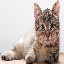

In [ ]:
img

In [ ]:
img = img_to_array(img)

In [ ]:
img = img.reshape((1,) + img.shape)

In [ ]:
img.shape

(1, 64, 64, 3)

In [ ]:
cnn.predict(x=img)

array([[1.]], dtype=float32)